<a href="https://colab.research.google.com/github/nikeyzdereva/2/blob/main/claster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [18]:
dataset = pd.read_csv('mall_customers.csv')
dataset.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
X = dataset.iloc[:, [ 3, 4]].values

In [20]:
from sklearn.cluster import KMeans
wcss = []

In [21]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

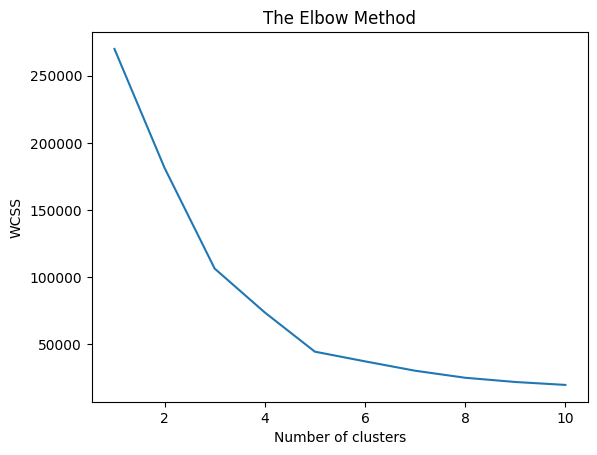

[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37233.814510710006, 30259.65720728547, 25011.839349156588, 21862.092672182895, 19672.072849014323]


In [22]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
print(wcss)

In [23]:
clust_list = []
prop = []

In [24]:
for i in range(len(wcss) - 1):
    print(wcss[i])
    if i == 0:
        pass
    elif i > 0:
        prop.append(wcss[i+1]/wcss[i])
        prop.sort()
        print(prop)
        clust_list = round(prop[-1])

269981.28
181363.59595959593
[0.5863821374924847]
106348.37306211122
[0.5863821374924847, 0.6928153851160163]
73679.78903948836
[0.5863821374924847, 0.6032652376910546, 0.6928153851160163]
44448.4554479337
[0.5863821374924847, 0.6032652376910546, 0.6928153851160163, 0.8376852274276476]
37233.814510710006
[0.5863821374924847, 0.6032652376910546, 0.6928153851160163, 0.8126929138184733, 0.8376852274276476]
30259.65720728547
[0.5863821374924847, 0.6032652376910546, 0.6928153851160163, 0.8126929138184733, 0.8265737836294659, 0.8376852274276476]
25011.839349156588
[0.5863821374924847, 0.6032652376910546, 0.6928153851160163, 0.8126929138184733, 0.8265737836294659, 0.8376852274276476, 0.8740697701994514]
21862.092672182895
[0.5863821374924847, 0.6032652376910546, 0.6928153851160163, 0.8126929138184733, 0.8265737836294659, 0.8376852274276476, 0.8740697701994514, 0.899825700311154]


In [25]:
print(clust_list)
opt_num_clust = round(clust_list)
print(opt_num_clust)

1
1


In [26]:
Z = linkage(X, 'single')

In [32]:
# Вывод дендрограммы
fig = plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

Text(0, 0.5, 'Distance')

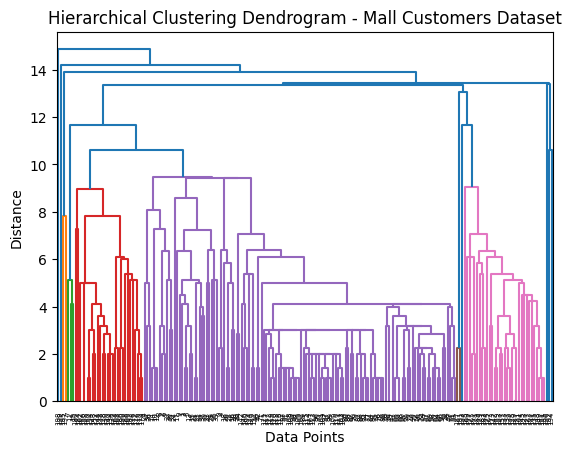

In [35]:
dn = dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram - Mall Customers Dataset')
plt.xlabel('Data Points')
plt.ylabel('Distance')

In [29]:
plt.show()

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [43]:
cut = cut_tree(Z, n_clusters=5)

In [44]:
labels = fcluster(Z, t=5, criterion='maxclust')